# Random Forest

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.tree import export_graphviz
from subprocess import call
from IPython.display import Image

In [2]:
df_football = pd.read_pickle('data/df_data_cleaned.csv')
df_football

Name   Age  Overall  Potential                 Club  \
0                L. Messi  31.0     94.0       94.0         FC Barcelona   
1       Cristiano Ronaldo  33.0     94.0       94.0             Juventus   
2               Neymar Jr  26.0     92.0       93.0  Paris Saint-Germain   
3            K. De Bruyne  27.0     91.0       92.0      Manchester City   
4               E. Hazard  27.0     91.0       91.0              Chelsea   
...                   ...   ...      ...        ...                  ...   
14738        J. Lundstram  19.0     47.0       65.0      Crewe Alexandra   
14739  N. Christoffersson  19.0     47.0       63.0       Trelleborgs FF   
14740           B. Worman  16.0     47.0       67.0     Cambridge United   
14741      D. Walker-Rice  17.0     47.0       66.0      Tranmere Rovers   
14742           G. Nugent  16.0     46.0       66.0      Tranmere Rovers   

           Value      Wage  Special  Preferred Foot  International Reputation  \
0      1.105e+08  5.65e+07   2202.0             0.0                       5.0   
1        7.7e+07  4.05e+07   2228.0             1.0                       5.0   
2      1.185e+08   2.9e+07   2143.0             1.0                       5.0   
3       1.02e+08  3.55e+07   2281.0             1.0                       4.0   
4        9.3e+07   3.4e+07   2142.0             1.0                       4.0   
...          ...       ...      ...             ...                       ...   
14738      6e+06    100000   1307.0             1.0                       1.0   
14739      6e+06    100000   1098.0             1.0                       1.0   
14740      6e+06    100000   1189.0             1.0                       1.0   
14741      6e+06    100000   1228.0             1.0                       1.0   
14742      6e+06    100000   1321.0             1.0                       1.0   

       ...  Composure  Marking StandingTackle  SlidingTackle  GKDiving  \
0      ...       96.0     33.0           28.0           26.0       6.0   
1      ...       95.0     28.0           31.0           23.0       7.0   
2      ...       94.0     27.0           24.0           33.0       9.0   
3      ...       88.0     68.0           58.0           51.0      15.0   
4      ...       91.0     34.0           27.0           22.0      11.0   
...    ...        ...      ...            ...            ...       ...   
14738  ...       45.0     40.0           48.0           47.0      10.0   
14739  ...       42.0     22.0           15.0           19.0      10.0   
14740  ...       41.0     32.0           13.0           11.0       6.0   
14741  ...       46.0     20.0           25.0           27.0      14.0   
14742  ...       43.0     40.0           43.0           50.0      10.0   

       GKHandling  GKKicking  GKPositioning  GKReflexes  Release Clause  
0            11.0       15.0           14.0         8.0     226500000.0  
1            11.0       15.0           14.0        11.0     127100000.0  
2             9.0       15.0           15.0        11.0     228100000.0  
3            13.0        5.0           10.0        13.0     196400000.0  
4            12.0        6.0            8.0         8.0     172100000.0  
...           ...        ...            ...         ...             ...  
14738        13.0        7.0            8.0         9.0      14300000.0  
14739         9.0        9.0            5.0        12.0      11300000.0  
14740         5.0       10.0            6.0        13.0      16500000.0  
14741         6.0       14.0            8.0         9.0      14300000.0  
14742        15.0        9.0           12.0         9.0      16500000.0  

[14743 rows x 76 columns]

In [3]:
train, test = train_test_split(df_football, train_size=0.75, test_size=0.25)
X_train = train.drop(columns=['Name', 'Club', 'Position', 'Preferred Foot', 'Value'])
y_train = train[['Value']]
X_test = test.drop(columns=['Name', 'Club', 'Position', 'Preferred Foot', 'Value'])
y_test = test[['Value']]

## Random Forest
![Random forest image](https://miro.medium.com/max/936/1*58f1CZ8M4il0OZYg2oRN4w.png)
Is almost the same as Decission Tree, but here instead of one tree we a have "N" number of trees. it's one of the best ensemble learning methods. The idea behind this is to combine multiple decision trees to determine the final output, with this our model have more knowledge about our dataset (100 decission trees model are better than 1). If you want to know more about Decission trees go to his section in this repository

## Random Forest Regressor
#### Params
The majority of the params are the same as Decission Tree Regressor, here we're just going to see the new hyperparameters
* n_estimators: the numbers of DecissionTrees of our Random Forest
* Bootsrapt: True/False, if True, the model use train subsamples to build each tree, this help to reduce overfitting and give very good results. If false, the model train all trees with whole dataset. It's strongly recommendet choose the True option
* oob_score: True/False, is a way to validate Random Forest model. When we take the samples to train the model, the model leaves out some samples in order to validate the training set.
* Warm_start: it helps to increase the speed of training when you are fitting estimators repeatedly, for example it helps with GridsearCV, or if we want to add new trees to the Random Forest

### Random Forest Regressor

In [4]:
rf_reg = RandomForestRegressor(random_state=2019)

rf_reg.fit(X_train, y_train)
predictions = rf_reg.predict(X_test)
print('MAE in train:', mean_absolute_error(rf_reg.predict(X_train), y_train))
print('MSE in train:', np.sqrt(mean_squared_error(rf_reg.predict(X_train), y_train)))
print('MAE in test:', mean_absolute_error(rf_reg.predict(X_test), y_test))
print('RMSE in test:', np.sqrt(mean_squared_error(rf_reg.predict(X_test), y_test)))

/root/miniconda3/envs/pycharm/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/root/miniconda3/envs/pycharm/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


MAE in train: 1600506.4664918152
MSE in train: 4821357.244933999
MAE in test: 4159476.3971785135
RMSE in test: 11635513.344126025


We can see that wihout param tunning our Random Forest Regressor is in the same error than our Decision Tree Regressor with param tunning. Now let going to use hyperparams

In [5]:
rf_reg2 = RandomForestRegressor(n_estimators=200, oob_score=True, max_depth=25, 
                                random_state=2019, n_jobs=-1) #set n_jobs in -2 if your computer is not powerfull

rf_reg2.fit(X_train, y_train)
predictions = rf_reg2.predict(X_test)
print('MAE in train:', mean_absolute_error(rf_reg2.predict(X_train), y_train))
print('MSE in train:', np.sqrt(mean_squared_error(rf_reg2.predict(X_train), y_train)))
print('MAE in test:', mean_absolute_error(rf_reg2.predict(X_test), y_test))
print('RMSE in test:', np.sqrt(mean_squared_error(rf_reg2.predict(X_test), y_test)))

/root/miniconda3/envs/pycharm/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


MAE in train: 1427547.5484377632
MSE in train: 3839742.095168482
MAE in test: 3818616.4635352707
RMSE in test: 10524664.421507746


We have reduce our RMSE in 1M in comparision with our Decision Tree Regressor, Let's see the feature importance now

In [6]:
pd.DataFrame(rf_reg2.feature_importances_, index=X_train.columns).sort_values(by=0, ascending=False)[:8]

0
Release Clause  0.684630
Overall         0.097886
Potential       0.047471
Wage            0.016084
Age             0.012171
SlidingTackle   0.004770
ShotPower       0.004315
Finishing       0.004137

Wow as in Decision Tree, Release Clause is the most important feature, maybe if we drop this feature, we will obtain better result

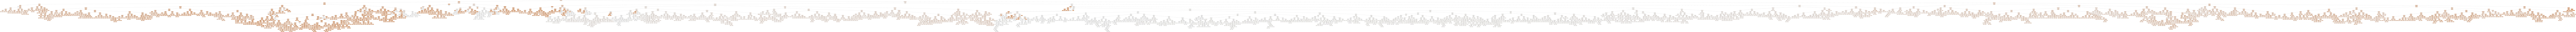

In [11]:
export_graphviz(rf_reg2.estimators_[100], out_file='rf_reg.dot', 
                feature_names = X_train.columns,
                class_names = y_train.columns,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

call(['dot', '-Tpng', 'rf_reg.dot', '-o', 'rf_reg.png', '-Gdpi=600'])
Image(filename = 'rf_reg.png')

We choose one of our trees from our Random Forest. The trees will be slightly different from one another

## Random Forest Classifier

In [12]:
def age_group_creator(age):
    if age <24:
        return 0 #young
    elif age >= 24 and age < 30:
        return 1 #medium age
    else:
        return 2 #old
        
df_football['age_group'] = df_football.apply(lambda x: age_group_creator(x['Age']), axis=1)
df_football

Name   Age  Overall  Potential                 Club  \
0                L. Messi  31.0     94.0       94.0         FC Barcelona   
1       Cristiano Ronaldo  33.0     94.0       94.0             Juventus   
2               Neymar Jr  26.0     92.0       93.0  Paris Saint-Germain   
3            K. De Bruyne  27.0     91.0       92.0      Manchester City   
4               E. Hazard  27.0     91.0       91.0              Chelsea   
...                   ...   ...      ...        ...                  ...   
14738        J. Lundstram  19.0     47.0       65.0      Crewe Alexandra   
14739  N. Christoffersson  19.0     47.0       63.0       Trelleborgs FF   
14740           B. Worman  16.0     47.0       67.0     Cambridge United   
14741      D. Walker-Rice  17.0     47.0       66.0      Tranmere Rovers   
14742           G. Nugent  16.0     46.0       66.0      Tranmere Rovers   

           Value      Wage  Special  Preferred Foot  International Reputation  \
0      1.105e+08  5.65e+07   2202.0             0.0                       5.0   
1        7.7e+07  4.05e+07   2228.0             1.0                       5.0   
2      1.185e+08   2.9e+07   2143.0             1.0                       5.0   
3       1.02e+08  3.55e+07   2281.0             1.0                       4.0   
4        9.3e+07   3.4e+07   2142.0             1.0                       4.0   
...          ...       ...      ...             ...                       ...   
14738      6e+06    100000   1307.0             1.0                       1.0   
14739      6e+06    100000   1098.0             1.0                       1.0   
14740      6e+06    100000   1189.0             1.0                       1.0   
14741      6e+06    100000   1228.0             1.0                       1.0   
14742      6e+06    100000   1321.0             1.0                       1.0   

       ...  Marking  StandingTackle SlidingTackle  GKDiving  GKHandling  \
0      ...     33.0            28.0          26.0       6.0        11.0   
1      ...     28.0            31.0          23.0       7.0        11.0   
2      ...     27.0            24.0          33.0       9.0         9.0   
3      ...     68.0            58.0          51.0      15.0        13.0   
4      ...     34.0            27.0          22.0      11.0        12.0   
...    ...      ...             ...           ...       ...         ...   
14738  ...     40.0            48.0          47.0      10.0        13.0   
14739  ...     22.0            15.0          19.0      10.0         9.0   
14740  ...     32.0            13.0          11.0       6.0         5.0   
14741  ...     20.0            25.0          27.0      14.0         6.0   
14742  ...     40.0            43.0          50.0      10.0        15.0   

       GKKicking  GKPositioning  GKReflexes  Release Clause  age_group  
0           15.0           14.0         8.0     226500000.0          2  
1           15.0           14.0        11.0     127100000.0          2  
2           15.0           15.0        11.0     228100000.0          1  
3            5.0           10.0        13.0     196400000.0          1  
4            6.0            8.0         8.0     172100000.0          1  
...          ...            ...         ...             ...        ...  
14738        7.0            8.0         9.0      14300000.0          0  
14739        9.0            5.0        12.0      11300000.0          0  
14740       10.0            6.0        13.0      16500000.0          0  
14741       14.0            8.0         9.0      14300000.0          0  
14742        9.0           12.0         9.0      16500000.0          0  

[14743 rows x 77 columns]

In [13]:
train, test = train_test_split(df_football, train_size=0.75, test_size=0.25)
X_train = train.drop(columns=['Name', 'Club', 'Position', 'Preferred Foot', 'Age', 'age_group'])
y_train = train[['age_group']]
X_test = test.drop(columns=['Name', 'Club', 'Position', 'Preferred Foot', 'Age', 'age_group'])
y_test = test[['age_group']]

Whithout param tunning

In [14]:
#instance
rf_class = RandomForestClassifier()

#train
rf_class.fit(X_train, y_train)

#train preds
preds_train = rf_class.predict(X_train)

#metrics classifications in train
print('CLASSIFICATION IN TRAIN')
print()
print('CONFUSION MATRIX:\n', confusion_matrix(preds_train, y_train))
print()
print('F1 SCORE:\n', f1_score(preds_train, y_train, average='micro'))
print()
print('CLASSIFICATION REPORT\n',classification_report(preds_train, y_train))

/root/miniconda3/envs/pycharm/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/root/miniconda3/envs/pycharm/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


CLASSIFICATION IN TRAIN

CONFUSION MATRIX:
 [[4427   24    0]
 [   6 4487   60]
 [   0    1 2052]]

F1 SCORE:
 0.991769919508004

CLASSIFICATION REPORT
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      4451
           1       0.99      0.99      0.99      4553
           2       0.97      1.00      0.99      2053

    accuracy                           0.99     11057
   macro avg       0.99      0.99      0.99     11057
weighted avg       0.99      0.99      0.99     11057



In [15]:
#Classification in test
preds_trest = rf_class.predict(X_test)

#metrics classifications in train
print('CLASSIFICATION IN TEST')
print()
print('CONFUSION MATRIX:\n', confusion_matrix(preds_trest, y_test))
print()
print('F1 SCORE:\n', f1_score(preds_trest, y_test, average='micro'))
print()
print('CLASSIFICATION REPORT\n',classification_report(preds_trest, y_test))

CLASSIFICATION IN TEST

CONFUSION MATRIX:
 [[1275  194   11]
 [ 172 1230  402]
 [   8   98  296]]

F1 SCORE:
 0.7599023331524687

CLASSIFICATION REPORT
               precision    recall  f1-score   support

           0       0.88      0.86      0.87      1480
           1       0.81      0.68      0.74      1804
           2       0.42      0.74      0.53       402

    accuracy                           0.76      3686
   macro avg       0.70      0.76      0.71      3686
weighted avg       0.79      0.76      0.77      3686



With param tunning

In [16]:
#instance
rf_class2 = RandomForestClassifier(criterion='entropy', n_estimators=400, max_features=25, class_weight='balanced_subsample',
                                   n_jobs=-1, oob_score=True)

#train
rf_class2.fit(X_train, y_train)

#train preds
preds_train = rf_class2.predict(X_train)

#metrics classifications in train
print('CLASSIFICATION IN TRAIN')
print()
print('CONFUSION MATRIX:\n', confusion_matrix(preds_train, y_train))
print()
print('F1 SCORE:\n', f1_score(preds_train, y_train, average='micro'))
print()
print('CLASSIFICATION REPORT\n',classification_report(preds_train, y_train))

/root/miniconda3/envs/pycharm/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


CLASSIFICATION IN TRAIN

CONFUSION MATRIX:
 [[4433    0    0]
 [   0 4512    0]
 [   0    0 2112]]

F1 SCORE:
 1.0

CLASSIFICATION REPORT
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4433
           1       1.00      1.00      1.00      4512
           2       1.00      1.00      1.00      2112

    accuracy                           1.00     11057
   macro avg       1.00      1.00      1.00     11057
weighted avg       1.00      1.00      1.00     11057



In [17]:
#Classification in test
preds_trest = rf_class2.predict(X_test)

#metrics classifications in train
print('CLASSIFICATION IN TEST')
print()
print('CONFUSION MATRIX:\n', confusion_matrix(preds_trest, y_test))
print()
print('F1 SCORE:\n', f1_score(preds_trest, y_test, average='micro'))
print()
print('CLASSIFICATION REPORT\n',classification_report(preds_trest, y_test))

CLASSIFICATION IN TEST

CONFUSION MATRIX:
 [[1308  103    0]
 [ 147 1376  261]
 [   0   43  448]]

F1 SCORE:
 0.8497015735214325

CLASSIFICATION REPORT
               precision    recall  f1-score   support

           0       0.90      0.93      0.91      1411
           1       0.90      0.77      0.83      1784
           2       0.63      0.91      0.75       491

    accuracy                           0.85      3686
   macro avg       0.81      0.87      0.83      3686
weighted avg       0.87      0.85      0.85      3686



In [18]:
pd.DataFrame(rf_class2.feature_importances_, index=X_train.columns).sort_values(by=0, ascending=False)[:8]

0
Potential       0.194546
Overall         0.143421
Value           0.061203
Release Clause  0.044618
Reactions       0.039115
Composure       0.034607
SprintSpeed     0.025257
Special         0.025182

In [19]:
#See our 200 trees
rf_class2.estimators_

[DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                        max_features=25, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort=False,
                        random_state=1885439718, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                        max_features=25, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort=False,
                        random_state=1773569894, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                        max_features=25, max_leaf_nodes=None,
                    

Our Random Forest Classifier have the same accuracy as our Decision Tree Classifier, This shows us that there are no better models than others. It all depends on our dataset and the types of data we're dealing with.

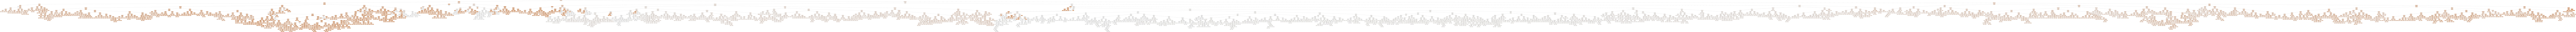

In [21]:
export_graphviz(rf_class2.estimators_[100], out_file='rf_class.dot', 
                feature_names = X_train.columns,
                class_names = list(map(str, y_train.age_group.drop_duplicates().tolist())),
                rounded = True, proportion = False, 
                precision = 2, filled = True)

call(['dot', '-Tpng', 'rf_class.dot', '-o', 'rf_class.png', '-Gdpi=600'])
Image(filename = 'rf_reg.png')